In [2]:
import torch
import matplotlib.pyplot as plt

In [6]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward()
print('Derivative:', x.grad.numpy())

Derivative: 4.0


In [7]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [8]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad) # No grad because it is a non-leaf tensor
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x0000016235B46948>
grad: None
is_leaf: False
requires_grad: True


C:\Users\msctb\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# Calculate the y = x^2 + 2x + 1, then find the derivative 
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 2*x + 1
y.backward()
print(x.grad)

tensor(6.)


In [29]:
# Practice: Calculate the derivative of y = 2x^3 + x at x = 1
x = torch.tensor(1.0, requires_grad=True)
y = 2*x**3 + x
y.backward()
print(x.grad)

tensor(7.)


In [30]:
class SQ(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result = i**2
        ctx.save_for_backward(i)
        return result
    
    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [32]:
x = torch.tensor(2.0, requires_grad=True)
sq = SQ.apply
y = sq(x)
print(y)
print(y.grad_fn)
y.backward()
print(x.grad)

tensor(4., grad_fn=<SQBackward>)
tensor(4.)


In [41]:
# Partial Derivatives
u = torch.tensor(1.0, requires_grad=True)
v = torch.tensor(2.0, requires_grad=True)
z = u*v + u**2
print('Result:', z)

Result: tensor(3., grad_fn=<AddBackward0>)


In [42]:
z.backward() # One time run

In [43]:
# Calculate the derivative with respect to u
print('dz(u,v)/du:', u.grad.numpy())
print('dz(u,v)/dv:', v.grad.numpy())

dz(u,v)/du: 4.0
dz(u,v)/dv: 1.0


In [53]:
x = torch.linspace(-10, 10, 10, requires_grad=True)
y = x**2
y_sum = torch.sum(x**2)
print(y)
print(y_sum)

tensor([100.0000,  60.4938,  30.8642,  11.1111,   1.2346,   1.2346,  11.1111,
         30.8642,  60.4938, 100.0000], grad_fn=<PowBackward0>)
tensor(407.4074, grad_fn=<SumBackward0>)


In [54]:
y_sum.backward()

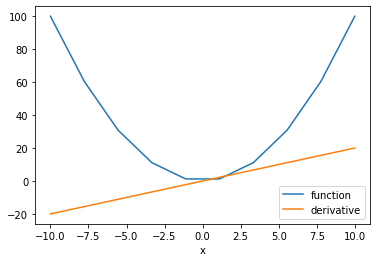

In [55]:
# Take the derivative with respect to multiple value. Plot out the function and its derivative
plt.plot(x.detach().numpy(), y.detach().numpy(), label='function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='derivative')
plt.xlabel('x')
plt.legend()
plt.show()

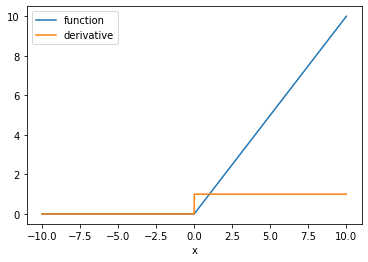

In [61]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative
x = torch.linspace(-10, 10, 1000, requires_grad=True)
y = torch.relu(x)
y_sum = y.sum()
y_sum.backward()

plt.plot(x.detach().numpy(), y.detach().numpy(), label='function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [62]:
y.grad_fn

In [65]:
# Practice: Calculate the derivative of f = u * v + (u * v) ** 2 at u = 2, v = 1
u = torch.tensor(2.0, requires_grad=True)
v = torch.tensor(1.0, requires_grad=True)
f = u*v + (u*v)**2
# df/du = v + 2uv^2 = 5
# df/dv = u + 2vu^2 = 10
f.backward()
print('df/du:', u.grad.numpy())
print('df/dv:', v.grad.numpy())

df/du: 5.0
df/dv: 10.0
